# Predicción de la calidad del vino - Árboles de decisión

En el siguiente ejercicio, disponemos de un conjunto de datos acerca de la calidad del vino, de forma que se busca, por medio de un modelo de clasificación de árboles de decisión, poder definir la calidad de un vino en base a sus características principales.

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score




#Configuración Gráficas
# ==============================================================================
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4.5]
palette = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7"]
sns.set_theme( palette= palette, context= "notebook")

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 1. Análisis Exploratorio de Datos (EDA)

A continuación, vamos a realizar el análisis exploratorio de datos del conjunto de datos acerca de la calidad de diferentes vinos en base a sus características. Esto se desarrolla con el fin de detectar patrones, tendencias y relaciones entre las diferentes variables del conjunto de datos. Además, nos permite detectar anomalías y datos faltantes, y darles el tratamiento más adecuado para nuestro caso de estudio.

### 1.1 Ingreso de datos
Ingresamos los datos sobre los cuales vamos a realizar el análisis y, posteriormente, la creación del modelo.

In [2]:
# Datos
# ==============================================================================

df = pd.read_csv("winequality-red.csv", 
                 header=0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Cada columna del DataFrame corresponde a:

1. Acidez fija
2. Acidez volátil
3. Ácido cítrico
4. Azúcar residual
5. Cloruros
6. Dióxido de azufre libre
7. Dióxido de azufre total
8. Densidad
9. pH
10. Sulfatos
11. Alcohol
Variable de salida (basada en datos sensoriales):
12. Calidad (puntuación entre 0 y 10)

Procedemos a modificar los nombres de cada columna del DataFrame.

In [3]:
# Modificamos las columnas para que tengan nombres más descriptivos
# =================================================================

df.columns = [
    'acidez_fija', 
    'acidez_volatil', 
    'acido_citrico', 
    'azucar_residual', 
    'cloruros', 
    'dioxido_de_azufre_libre', 
    'dioxido_de_azufre_total', 
    'densidad', 
    'pH', 
    'sulfatos', 
    'alcohol', 
    'calidad'
]
df

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 1.2 Resumen de datos
Empezamos a comprender nuestros datos por medio de los resúmenes de datos.

In [4]:
# Obtenemos las primeras filas del dataFrame
# =========================================

df.head(5)

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


La variable dependiente que vamos a predecir será __*calidad*__. Esta variable tiene una escala de calidad del vino. Las demás variables serán las variables independientes.

In [5]:
# Realizamos un resumen de los datos
# =================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   acidez_fija              1599 non-null   float64
 1   acidez_volatil           1599 non-null   float64
 2   acido_citrico            1599 non-null   float64
 3   azucar_residual          1599 non-null   float64
 4   cloruros                 1599 non-null   float64
 5   dioxido_de_azufre_libre  1599 non-null   float64
 6   dioxido_de_azufre_total  1599 non-null   float64
 7   densidad                 1599 non-null   float64
 8   pH                       1599 non-null   float64
 9   sulfatos                 1599 non-null   float64
 10  alcohol                  1599 non-null   float64
 11  calidad                  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Todas las variables son numéricas. Además, podemos observar que el conjunto de datos no tiene ningún valor nulo, por lo que no tenemos que realizar ningún tratamiento de valores faltantes en este caso. Tampoco es necesario realizar alguna transformación de características.

### 1.3 Valores Atípicos

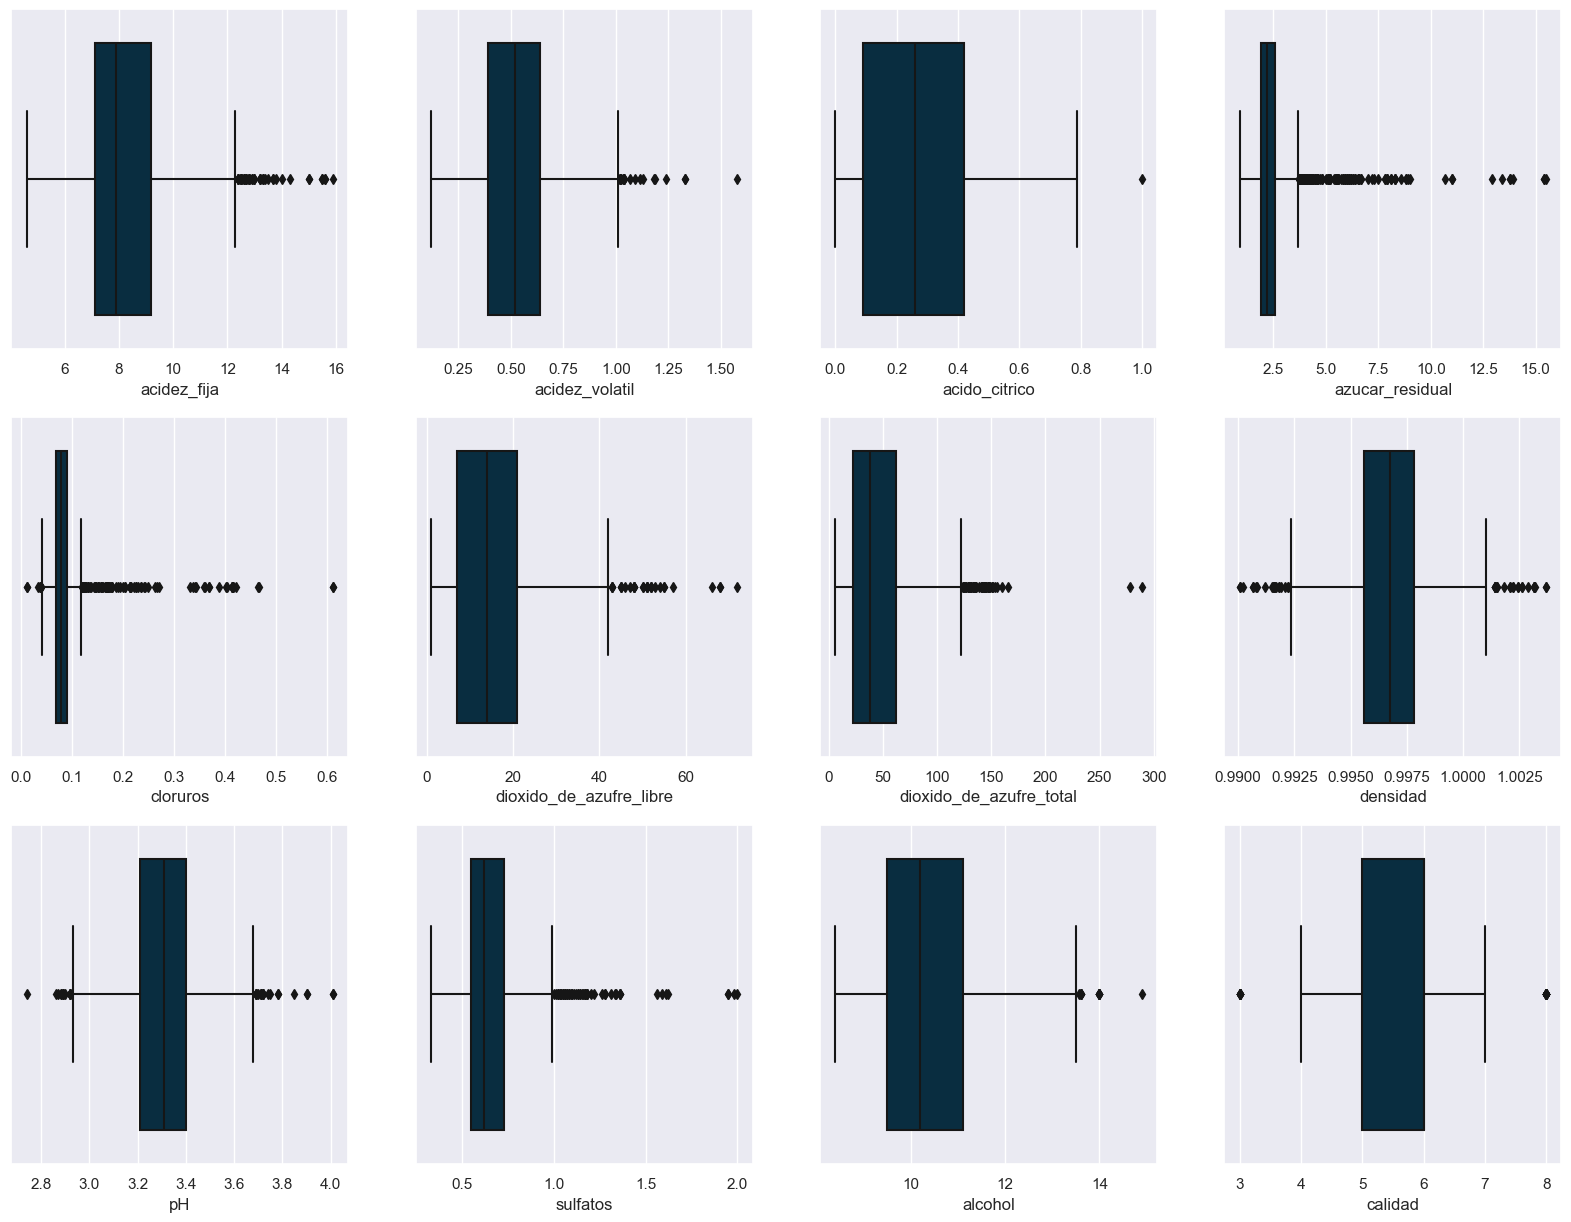

In [6]:
# Creamos una matriz de gráficos de caja
# =============================================

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Creamos un bucle para recorrer las columnas
# =============================================

for i, var in enumerate(df.columns):
    sns.boxplot(data = df, 
                x = var, 
                ax = axes[i//4, i%4]
                )

En esta situación, aunque observamos la presencia de valores atípicos en ciertas variables, es fundamental analizarlos detenidamente para determinar si su exclusión es apropiada o no. No obstante, dado que el conjunto de datos ya ha sido preprocesado, es probable que estos valores atípicos no sean errores de medición, sino mediciones legítimas. Por lo tanto, lo más recomendable sería incorporarlos en el modelo.

### 1.4 Análisis Univariable
A continuación, realizaremos el análisis univariable de cada variable que forma parte de nuestro conjunto de datos. Esto lo llevaremos a cabo mediante un resumen de datos y representaciones gráficas como histogramas.

In [7]:
# Obtenemos los estadísticos descriptivos más importantes
# =======================================================

df.describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


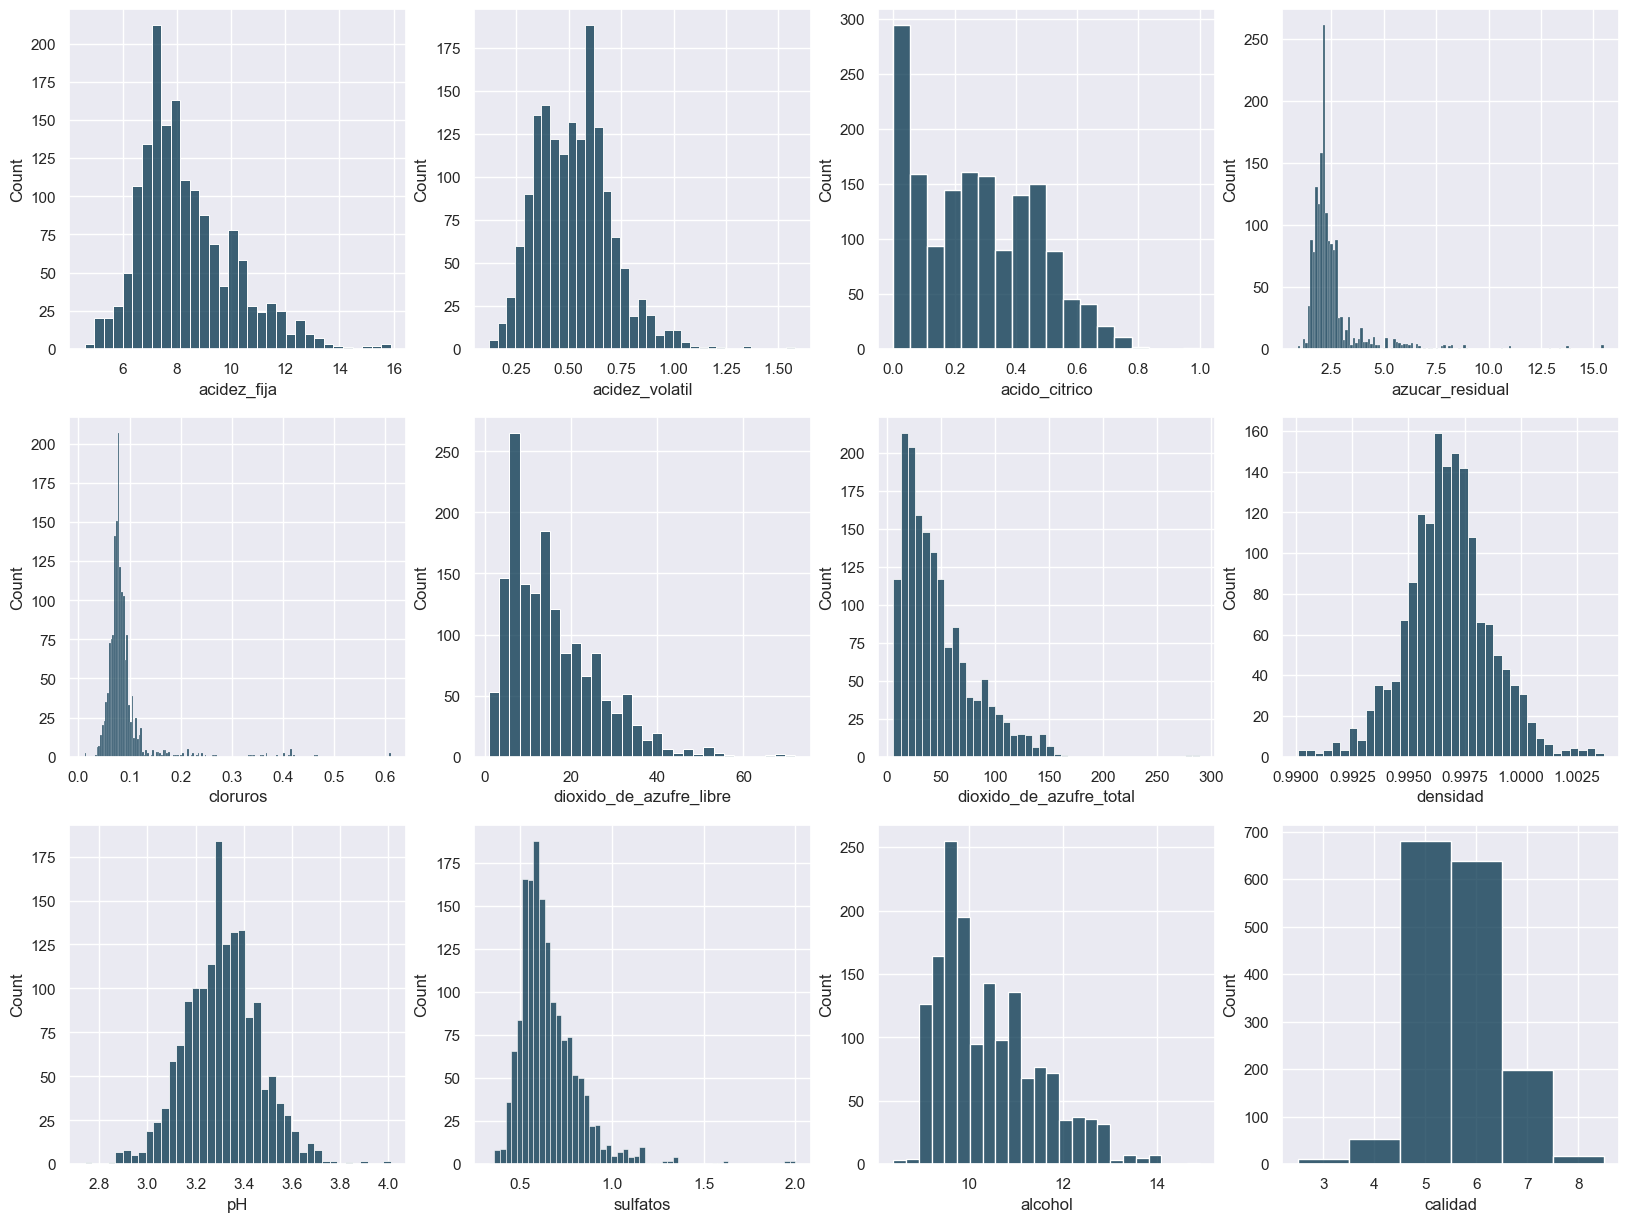

In [8]:
# Creamos una matriz de histogramas
# ====================================

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Creamos un bucle para recorrer las columnas
# =============================================

for i, var in enumerate(df.columns[:-1]):
    sns.histplot(data = df, 
                 x = var , 
                 ax = axes[i//4, i%4]
                 )
sns.histplot(ax= axes[2,3], 
             data= df, 
             x= "calidad", 
             discrete= True
             );

Del análisis univariable se pueden observar los siguientes puntos:

- La mayoría de los conjuntos de datos siguen una distribución normal, destacándose visualmente el *pH*, la *densidad* y la *acidez_volátil* por su ajuste cercano a la distribución normal.

- Las distribuciones de *dióxido_de_azufre_libre*, *dióxido_de_azufre_total*, *azúcar_residual*, *sulfatos*, *acidez_fija* y *alcohol* muestran distribuciones asimétricas positivas, lo que indica una cola hacia la derecha en la distribución.

- La mayoría de los valores de la variable objetivo, *calidad*, se encuentran en el rango de 5 o 6, con una proporción muy reducida en los valores 3 y 8. Además, no se registran vinos con una puntuación de calidad superior a 8 o inferior a 3.

### 1.5 Análisis Bivariado
A continuación, vamos a realizar un análisis bivariado para identificar la relación que pueda existir entre cada variable independiente y la variable objetivo, que es calidad.

In [9]:
# Obtenemos las primeras filas del dataFrame
# =========================================

df.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


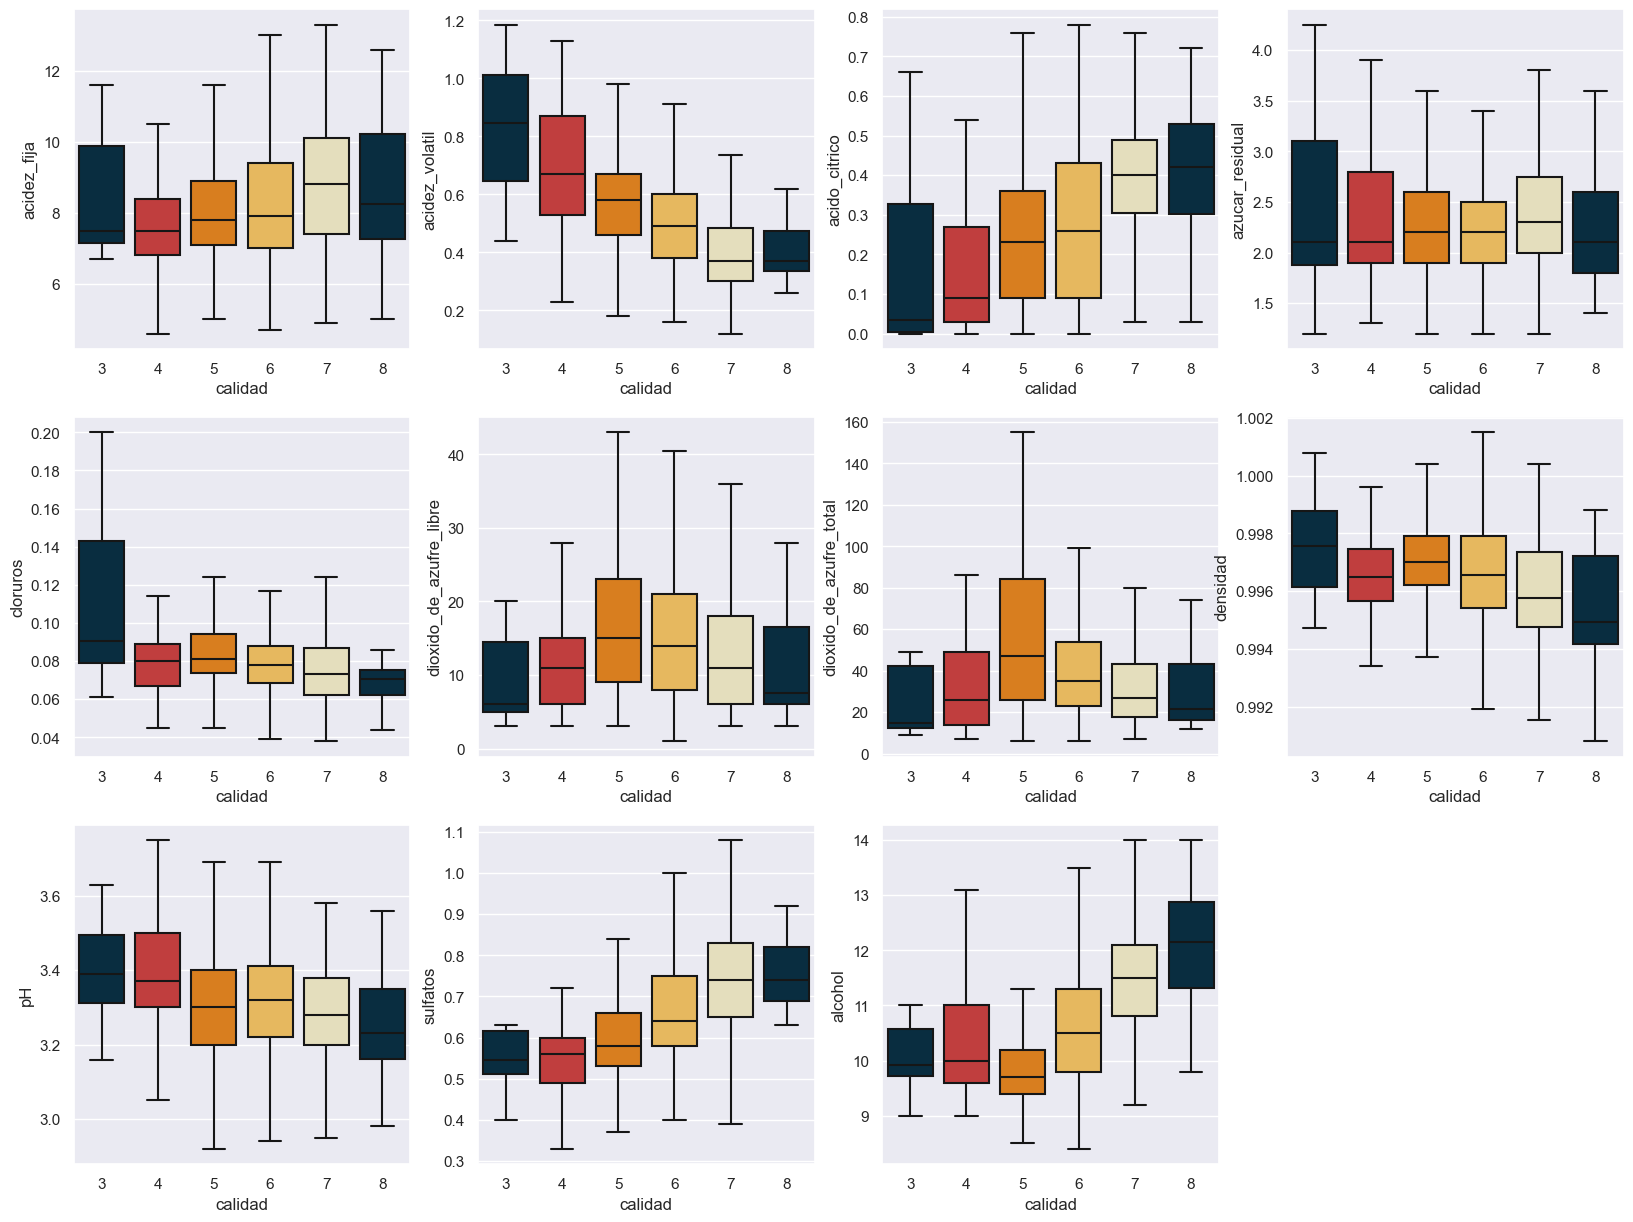

In [10]:
# Creamos una matriz de gráficos de caja
# =============================================

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Creamos un bucle para recorrer las columnas
# =============================================

for i, var in enumerate(df.columns[:-1]):
    sns.boxplot(data = df, 
                x = "calidad", 
                y = var, 
                ax = axes[i//4, i%4], 
                palette= palette, 
                showfliers= False
                )
fig.delaxes(axes[2,3])

In [11]:
# Creamos una matriz de correlación con el método corr de pandas
# =================================================================
df.corr(numeric_only= True)

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
acidez_fija,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
acidez_volatil,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
acido_citrico,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
azucar_residual,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
cloruros,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
dioxido_de_azufre_libre,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
dioxido_de_azufre_total,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
densidad,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulfatos,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Del análisis bivariado se pueden destacar los siguientes hallazgos:

- A medida que la acidez volátil del vino disminuye, tiende a mejorar su puntaje de calidad, estas dos variables poseen una correlacion con un valor de -0.39, lo cual indica una relacion debil inversa.

- Se observa una tendencia debil positiva entre la cantidad de ácido cítrico presente en el vino y su puntaje de calidad.

- Los vinos con los puntajes de calidad más bajos tienden a tener niveles más altos de cloruros en promedio.

- Existe una relación favorable entre los niveles elevados de sulfatos y alcohol en los vinos y sus puntajes de calidad.

## 2. Construcción del modelo de clasificación de Árbol de Decisión

### 2.1 Conjunto de variables independientes y la variable dependiente

A continuación, definimos cuáles van a ser las variables que formarán parte del conjunto de características y cuál será la variable dependiente.

In [12]:
# Declaramos las variables X e y
# =================================

X = df.drop("calidad", axis= 1)
y = df["calidad"]

### 2.2 Dividimos el conjunto de datos en datos de entrenamiento y de test

A continuación, debemos dividir el conjunto de datos en datos de entrenamiento, que serán utilizados para entrenar el modelo de clasificación, y el conjunto de test, que nos permitirá evaluar el modelo una vez entrenado. Utilizaremos una división con una proporción del 80% de datos de entrenamiento y el 20% restante de datos de test.

In [13]:
# Dividimos los datos en entrenamiento y test
# ===========================================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.30, 
                                                    random_state= 12, 
                                                    shuffle= True, 
                                                    stratify= y
                                                    )
print(f"Dimensiones del X_train: {X_train.shape}")
print(f"Dimensiones del X_test: {X_test.shape}")
print(f"Dimensiones del y_train : {y_train.shape}")
print(f"Dimensiones del y_test: {y_test.shape}")

Dimensiones del X_train: (1119, 11)
Dimensiones del X_test: (480, 11)
Dimensiones del y_train : (1119,)
Dimensiones del y_test: (480,)



### 2.3 Entrenamos el modelo

A continuación, entrenaremos el modelo de árbol de decisión con el conjunto de datos de entrenamiento. Además, vamos a establecer un límite de profundidad del árbol de 5 niveles. Este argumento nos ayuda a evitar que el modelo se sobreajuste al conjunto de datos de entrenamiento, de forma que el modelo tenga la capacidad de generalización. Este nivel de profundidad es un factor determinante en la precisión del modelo, por lo que es necesario comprobar varios niveles de profundidad.

In [14]:
# Creamos un árbol de decisión
# =================================

tree = DecisionTreeClassifier(max_depth= 5, random_state= 12)

# Entrenamos el árbol
# ==================================
arbol_modelo = tree.fit(X_train, y_train)

### 2.4 Esquema del modelo
Podemos observar el esquema del árbol por medio de dos formas principales:

- La primera es la representación por medio de texto. Esto lo podemos lograr a través de la instrucción `export_text()`. Esta instrucción nos proporciona una representación textual del árbol de decisión, de forma que podemos comprender cómo se toman las decisiones en cada nodo del árbol.

In [15]:
# Creamos una representación textual del árbol
# =============================================

modelo_arbol_texto = export_text(decision_tree=arbol_modelo, 
                                 feature_names= list(X_train.columns)
                                 )
print(modelo_arbol_texto)

|--- alcohol <= 10.35
|   |--- sulfatos <= 0.63
|   |   |--- dioxido_de_azufre_total <= 94.50
|   |   |   |--- sulfatos <= 0.47
|   |   |   |   |--- azucar_residual <= 1.30
|   |   |   |   |   |--- class: 7
|   |   |   |   |--- azucar_residual >  1.30
|   |   |   |   |   |--- class: 5
|   |   |   |--- sulfatos >  0.47
|   |   |   |   |--- acidez_volatil <= 0.65
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- acidez_volatil >  0.65
|   |   |   |   |   |--- class: 5
|   |   |--- dioxido_de_azufre_total >  94.50
|   |   |   |--- cloruros <= 0.07
|   |   |   |   |--- azucar_residual <= 2.45
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- azucar_residual >  2.45
|   |   |   |   |   |--- class: 6
|   |   |   |--- cloruros >  0.07
|   |   |   |   |--- densidad <= 1.00
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- densidad >  1.00
|   |   |   |   |   |--- class: 5
|   |--- sulfatos >  0.63
|   |   |--- dioxido_de_azufre_total <= 50.50
|   |   |   |--- pH <= 3.48
|   |   

- La segunda, y más utilizada, es por medio de la instrucción `plot_tree()`, que genera un diagrama del árbol de decisión. Este diagrama muestra cómo se divide el conjunto de datos en diferentes nodos basados en las características y los umbrales de decisión.

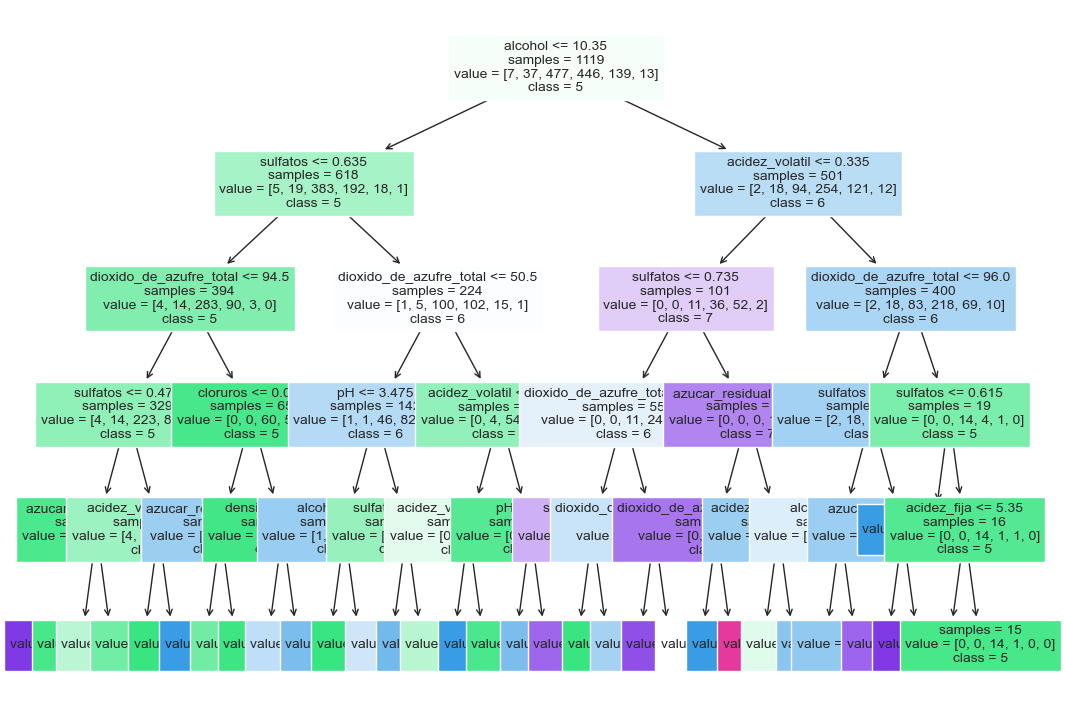

In [16]:
# Creamos una representación gráfica del árbol
# =============================================

fig, axes = plt.subplots(nrows= 1, 
                         ncols= 1, 
                         figsize= (12, 9)
                         )
plot_tree(arbol_modelo, 
          filled= True, 
          ax= axes, 
          impurity= False, 
          fontsize= 10, 
          feature_names= X.columns.to_list(), 
          class_names= ["3", "4", "5", "6", "7", "8"]
          );

Por medio de esta representación podemos comprender fácilmente cómo se establecen los umbrales de cada nodo del árbol. Además, nos permite observar la profundidad del árbol que hemos establecido de 5 niveles (el primer nivel es la raíz y se establece como el nivel 0).

Mediante la creación del diagrama, podríamos generar una predicción y realizar el recorrido en cada nodo hasta llegar al nodo hoja, donde podemos establecer la etiqueta a la que es más probable que pertenezca la observación, de acuerdo al árbol de decisión.

In [17]:
# Verificamos la profundidad del árbol
# =====================================
print(f' Profundidad del árbol: {arbol_modelo.get_depth()}')

# Comprobamos el número de nodos
# ===============================
print(f' Número de nodos terminales: {arbol_modelo.get_n_leaves()}')

 Profundidad del árbol: 5
 Número de nodos terminales: 31


### 2.5 Predicciones del modelo
Realizamos la predicción del modelo con el conjunto de características de prueba.

In [18]:
# Generamos las predicciones del modelo en el conjunto de test y las mostramos
# ==============================================================================

predicciones = arbol_modelo.predict(X_test)
predicciones

array([6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 7, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 5, 6, 7, 6, 5, 6, 5, 6, 7, 5, 5, 5, 5, 5, 6,
       5, 7, 5, 6, 6, 6, 6, 5, 7, 5, 6, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5, 6,
       6, 6, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 5, 6, 7, 6, 5, 6, 5, 6, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5,
       5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6,
       5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6,
       5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 7, 6, 5, 6, 6, 6, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 7, 6, 6, 6, 5, 7, 5,
       5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6,
       6, 5, 5, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 5, 5, 5, 7, 6, 6, 6, 5, 6,
       5, 7, 5, 6, 5, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5,

## 3. Evaluación del modelo
Ahora procedemos a evaluar el modelo. Inicialmente, vamos a crear una tabla de contingencia que nos permita observar cuántas veces las predicciones generadas con el modelo concordaron con las etiquetas reales del conjunto de datos de prueba.

In [19]:
# Creamos una tabla de contingencia
# =================================

pd.crosstab(np.array([i for i in y_test]), predicciones, 
            rownames=["Actual"], 
            colnames= ["predicciones"], 
            margins= True)

predicciones,5,6,7,All
Actual,,,,
3,3,0,0,3
4,15,1,0,16
5,144,58,2,204
6,75,108,9,192
7,4,40,16,60
8,0,4,1,5
All,241,211,28,480


En la tabla de frecuencias, podemos observar la cantidad de etiquetas de cada clase que el modelo de árbol de decisión pudo predecir correctamente *(es decir, que concuerda tanto la etiqueta de la columna como la de la fila)*. Por otro lado, las cantidades en las que no concuerdan son predicciones erradas que el modelo ha realizado. Entonces, de la tabla de frecuencias podemos observar lo siguiente:

El modelo no predijo ninguna observación que perteneciera a los valores de calidad 3, 4 y 8. Esto nos indica que, aunque utilizamos el argumento `stratify` al momento de dividir el conjunto de datos de entrenamiento y prueba con la finalidad de que los dos conjuntos tuvieran representación de todas las etiquetas debido a su desbalanceo, el dataset original tiene una representación muy baja de observaciones que pertenecen a esas etiquetas. De forma que, cuando entrenamos el modelo, este le da más importancia a las etiquetas que tienen una mayor frecuencia en el conjunto de datos.

Las mayores predicciones del modelo corresponden a los valores de calidad 5 y 6, que son las que más representación tienen en el conjunto de datos.

Asimismo, podemos cuantificar la proporción de observaciones que acertó el modelo en el conjunto de prueba. Esto lo hacemos a través del `score` del modelo.

In [20]:
# Hallamos la precisión del modelo en el conjunto de test
# =================================
print(f'El modelo tiene una precision de : {arbol_modelo.score(X_test, y_test):.3f}')

El modelo tiene una precision de : 0.558


Observamos que el modelo tiene una precisión de 0.558. Esto nos indica que tenemos un porcentaje de acierto del modelo creado del 55%, es decir, el modelo es capaz de predecir el puntaje de calidad basándose en el conjunto de características en un 55% de los casos.

## 4. Implementación del Modelo con Poda

Hasta ahora hemos creado el modelo de clasificación de árbol de decisión implementando técnicas de parada temprana, es decir, hemos establecido algun parámetro de detención cuando se cumple alguna condición. En nuestro caso, el único parámetro de parada que establecimos para el modelo fue una profundidad máxima de 5 niveles. Esto se realiza con la finalidad de evitar el sobreajuste del modelo.

Sin embargo, existe otra técnica comúnmente utilizada llamada Podado de árbol *(Tree pruning)*, que recurre al cost complexity pruning. Este método consiste en agregar un método de penalización similar al empleado en los métodos de regularización Ridge y Lasso para los modelos de regresión lineal. Una forma de hallar el valor óptimo de α para el valor de penalización es mediante la validación cruzada, utilizando la instrucción `GridSearchCV`.

In [21]:
# Definimos los pliegues para la validación cruzada estratificada y aleatoria
# ==============================================================================

cv = StratifiedKFold(n_splits=10, 
                     shuffle=True, 
                     random_state=1234
                     )

In [22]:
# Valores de ccp_alpha evaluados en la búsqueda por validación cruzada
# ==============================================================================

param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

# Búsqueda en rejilla con validación cruzada para encontrar el mejor valor de ccp_alpha
# ==============================================================================

grid = GridSearchCV(
        estimator = DecisionTreeClassifier(
                            max_depth= None,
                            criterion= 'gini',
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 1234,
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = cv,
        refit      = True,
        return_train_score = True,
      )

Una vez creado el modelo, lo entrenamos utilizando el conjunto de datos de entrenamiento

In [23]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'ccp_alpha': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])},
             return_train_score=True, scoring='accuracy')

Ahora podemos observar el mejor valor de alpha encontrado por la búsqueda en rejilla con validación cruzada.

In [24]:
grid.best_params_

{'ccp_alpha': 0.0}

El valor de alpha hallado por la búsqueda en rejilla por medio de la validación cruzada nos indica que el mejor árbol que podemos generar para este caso es el que no tiene ninguna restricción ni penalización. Esto sucede cuando el valor de $\alpha = 0$. Entonces, procedemos a crear el modelo con ese parámetro. Podemos utilizar el mejor modelo encontrado asignándole a una variable el atributo `.best_estimator_` del modelo.

In [25]:
# Asignamos el mejor modelo a la variable modelo_grid
# =============================================================

modelo_grid = grid.best_estimator_

### 4.1 Esquema del Modelo
Ahora vamos a generar el diagrama del modelo de clasificación del árbol de decisión generado.

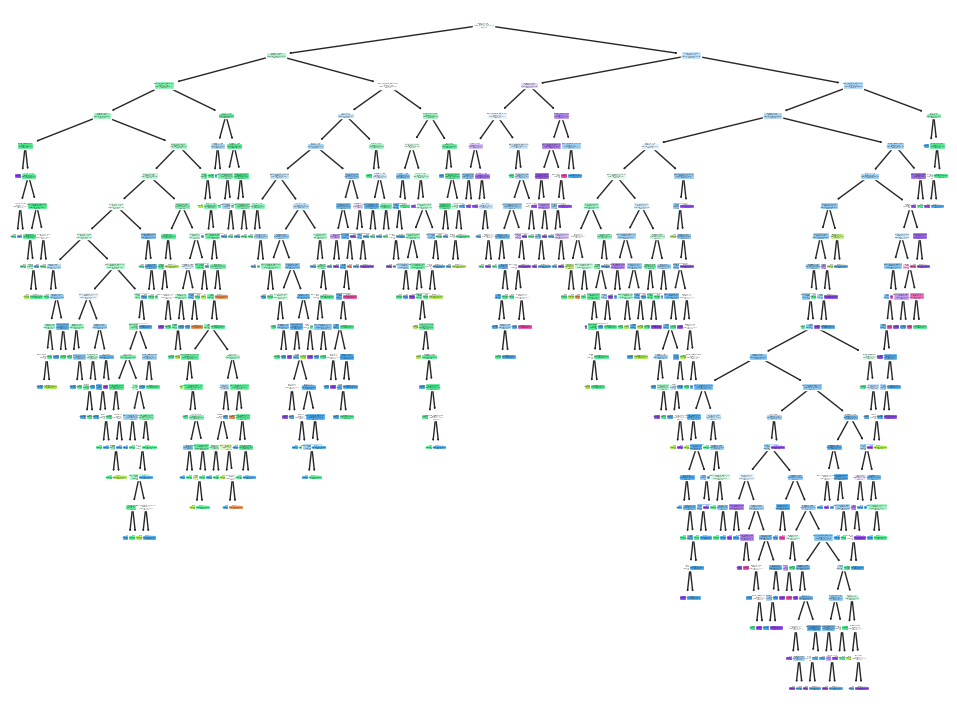

In [26]:
# Creamos una representación gráfica del árbol
# =============================================

fig, axes = plt.subplots(nrows= 1, 
                         ncols= 1, 
                         figsize= (12, 9)
                         )
plot_tree(modelo_grid, 
          filled= True, 
          ax= axes, 
          impurity= False, 
          feature_names= X.columns.to_list(), 
          class_names= ["3", "4", "5", "6", "7", "8"]
          );

Podemos observar que se genera un modelo más complejo que el anterior. Podemos comprobar cuántos niveles de profundidad y nodos terminales tiene este nuevo árbol de decisión implementado

In [27]:
# Verificamos la profundidad del árbol
# =====================================
print(f' Profundidad del árbol: {modelo_grid.get_depth()}')

# Comprobamos el número de nodos
# ===============================
print(f' Número de nodos terminales: {modelo_grid.get_n_leaves()}')

 Profundidad del árbol: 22
 Número de nodos terminales: 300


### 4.2 Evaluación del modelo

A continuación procedemos a evaluar el modelo con el conjunto de prueba.

In [28]:
# Hallamos la precisión del modelo en el conjunto de test
# =================================
print(f'El modelo tiene una precisión de : {modelo_grid.score(X_test, y_test):.3f}')

El modelo tiene una precisión de : 0.602


Esto indica que la precision del modelo es del 60%, de forma que la precision ha aumentado en aproximadamente 5% con respecto al primer modelo implementado.

## 5. Modelo con Transformación de Características
Otro enfoque que podemos utilizar con la finalidad de disminuir la cantidad de etiquetas que debe predecir el modelo es categorizar la calidad de los vinos como "bueno" si tienen un valor de calidad mayor o igual a 7. Este enfoque puede beneficiar la precisión del modelo, ya que cada etiqueta agrupa un rango de valores de calidad, mejorando la capacidad predictiva del modelo.

In [29]:
# Asignamos el DataFrame a una nueva variable
# ============================================
df2 = df.copy()

# Creamos una nueva columna con la calidad del vino
# =================================================
df2["grupo_calidad"] = np.where(df2["calidad"] < 7, "baja", "Alta")
df2

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad,grupo_calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,baja
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,baja
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,baja
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,baja
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,baja
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,baja
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,baja


Definimos el conjunto de características y la variable de respuesta, que en este caso será la columna *"grupo_calidad"* que hemos creado.

In [30]:
# Definimos las variables X2 e y2
# =================================

X2 = df2.drop(["calidad", "grupo_calidad"], axis= 1)
y2 = df2["grupo_calidad"]

Ahora dividimos nuestro conjunto en datos de entrenamiento y prueba

In [31]:
# Dividimos los datos en entrenamiento y test
# =======================================================================

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, 
                                                        test_size= 0.30, 
                                                        random_state= 12, 
                                                        shuffle= True, 
                                                        stratify= y2
                                                        )

Procedemos a crear un modelo de clasificación de árbol de decisión sobre el conjunto de datos transformado

In [32]:
# Creamos un árbol de decisión con los nuevos datos transformados
# =======================================================================
modelo_transformado = DecisionTreeClassifier(max_depth= 5, random_state= 12)

# Entrenamos el árbol con los nuevos datos transformados
# =======================================================================
modelo_transformado.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=5, random_state=12)

Vamos a generar el diagrama del árbol de decisión

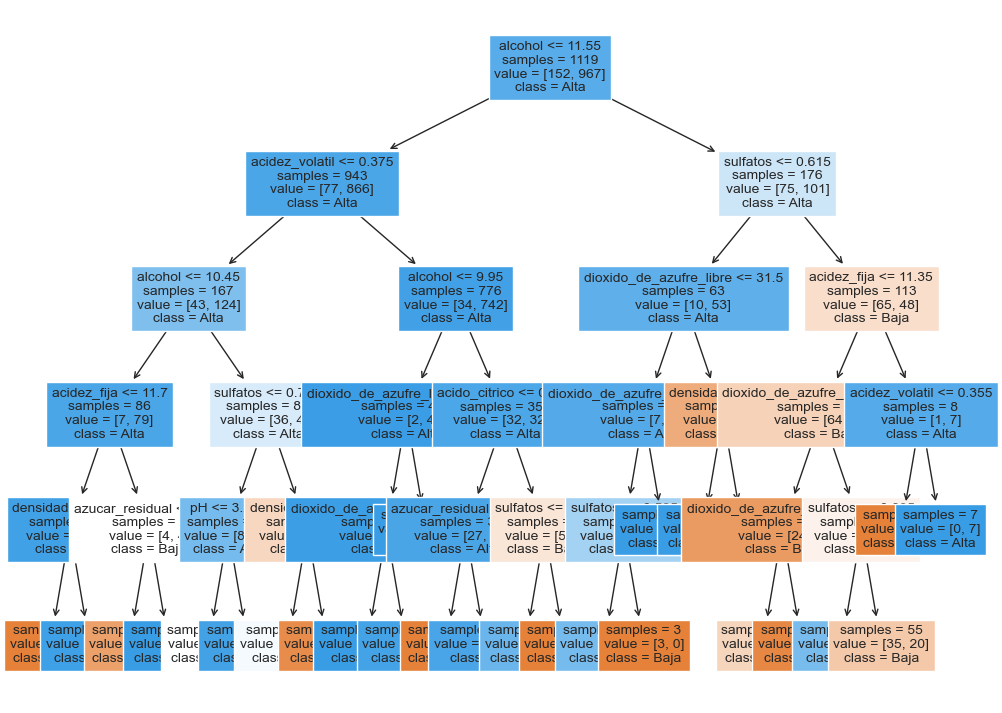

In [33]:
# Creamos una representación gráfica del árbol
# =============================================

fig, axes = plt.subplots(nrows= 1, 
                         ncols= 1, 
                         figsize= (12, 9)
                         )
plot_tree(modelo_transformado, 
          filled= True, 
          ax= axes, 
          impurity= False, 
          fontsize= 10,
          feature_names= X.columns.to_list(), 
          class_names= ["Baja", "Alta"]
          );

Vamos a evaluar el nuevo modelo generado mediante el método `score`.

In [34]:
# Hallamos la precisión del modelo en el conjunto de test
# =================================
print(f'El modelo tiene una precisión de : {modelo_transformado.score(X_test2, y_test2):.3f}')

El modelo tiene una precisión de : 0.908


## 6. Conclusiones

- Los modelos de árboles de decisión para problemas de clasificación son comúnmente utilizados debido a su facilidad de implementación. Además, estos funcionan como un modelo de caja blanca, es decir, si una situación dada es observable en el modelo, la explicación de la condición se entiende fácilmente mediante lógica booleana. Por el contrario, en un modelo de caja negra *(por ejemplo, una red neuronal artificial)*, los resultados pueden ser difíciles de interpretar.
  
- Como pudimos observar, no es necesario realizar la normalización de las variables. Otras técnicas generalmente requieren un preprocesado de datos, en las cuales se debe normalizar las variables para que el modelo funcione adecuadamente.
  
- Existen algunos factores determinantes en la creación de árboles de decisión, como la profundidad del árbol, el valor de penalización de $\alpha$, entre otros. Por lo tanto, resulta importante utilizar técnicas como la búsqueda en rejilla mediante validación cruzada, de forma que nos pueda brindar los valores óptimos de los parámetros del modelo de acuerdo con una métrica de bondad.
  
- Es posible mejorar la precisión del modelo mediante la implementación de técnicas como los bosques aleatorios. Esta técnica parte de la implementación de árboles de decisión, por lo que comprender esta técnica en profundidad resulta esencial para posteriormente poder implementar técnicas más avanzadas.

## 7. Referencias Bibliográficas

- Sempere, J. (2014). Aprendizaje de árboles de decisión. Universidad Politécnica de Valencia, Valencia.

- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

- Árboles de decisión con Python: regresión y clasificación - Ciencia de datos. https://cienciadedatos.net/documentos/py07_arboles_decision_python

- Pratap Dangeti. (2017). Statistics for Machine Learning : Build Supervised, Unsupervised, and Reinforcement Learning Models Using Both Python and R. Packt Publishing.

